In [1]:
#import libraries
import numpy as np
import pandas as pd


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Load dataset 
student_mat = pd.read_csv("C:\\Users\\Administrator\\Downloads\\student_mat.csv")

In [35]:
# View dataset
student_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [36]:
student_mat.shape

(395, 33)

In [37]:
student_mat.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

#### Final Grade

In [38]:
student_mat['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


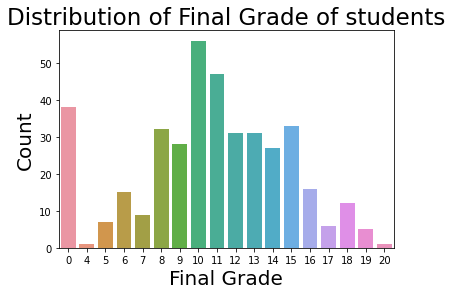

In [39]:
b= sns.countplot(student_mat['G3'])
b.axes.set_title("Distribution of Final Grade of students",fontsize=23)
b.set_xlabel('Final Grade', fontsize=20)
b.set_ylabel('Count',fontsize=20)
plt.show()

In [40]:
# Total male and female students
male_students = len(student_mat[student_mat['sex']=='M'])
female_students= len(student_mat[student_mat['sex']=='F'])
print('Number of male students: ',male_students)
print('Number of female students: ', female_students)

Number of male students:  187
Number of female students:  208


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


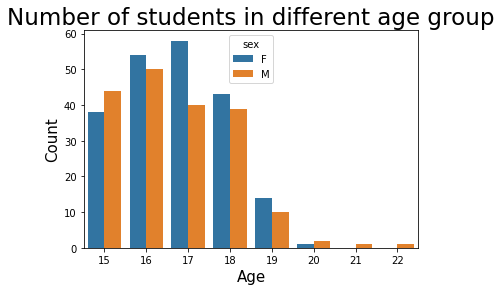

In [41]:
b=sns.countplot('age',hue='sex', data=student_mat)
b.axes.set_title('Number of students in different age group', fontsize=23)
b.set_xlabel('Age', fontsize=15)
b.set_ylabel('Count',fontsize=15)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


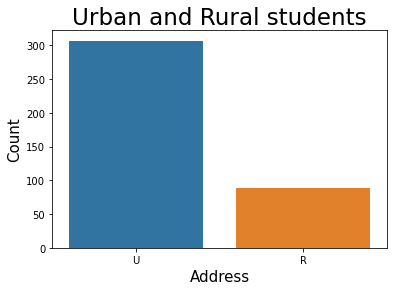

In [42]:
b= sns.countplot(student_mat['address'])
b.axes.set_title("Urban and Rural students", fontsize=23)
b.set_xlabel('Address', fontsize=15)
b.set_ylabel('Count', fontsize=15)
plt.show()


In [43]:
# average of grade in the 3 years
student_mat['GradeAvg']= (student_mat['G1'] + student_mat['G2']+ student_mat['G3'])/3

In [44]:
student_mat['GradeAvg']

0       5.666667
1       5.333333
2       8.333333
3      14.666667
4       8.666667
         ...    
390     9.000000
391    15.333333
392     8.333333
393    11.000000
394     8.666667
Name: GradeAvg, Length: 395, dtype: float64

Now lets create a grading based on its grade average:
Above 90% = Grade A
Between 70% & 90% = Grade B
Below 70% = Grade C

In [45]:
def find_grade(data):
    grades = []
    
    for row in student_mat['GradeAvg']:
        if row >= (0.9 * student_mat['GradeAvg'].max()):
            grades.append('1')
        elif row >= (0.7 * student_mat['GradeAvg'].max()):
            grades.append('2')
        elif row < (0.7 * student_mat['GradeAvg'].max()):
            grades.append('3')
    data['GradeAvg']= grades
    return data

In [46]:
student = find_grade(student_mat)

In [47]:
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GradeAvg
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,3
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,3
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,3
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,3


In [48]:
# drop school and age from the dataset
# school and age are not a computational values
student_mat.drop(['school','age'],axis=1, inplace = True)

In [49]:
# yes / no values:
d={'yes':1, 'no':0}
student['schoolsup']= student['schoolsup'].map(d)
student['famsup'] = student['famsup'].map(d)
student['paid'] = student['paid'].map(d)
student['activities'] = student['activities'].map(d)
student['nursery']= student['nursery'].map(d)
student['higher'] = student['higher'].map(d)
student['internet']= student['internet'].map(d)
student['romantic']= student['romantic'].map(d)

In [50]:
d={'F':1, 'M':0}
student['sex']= student['sex'].map(d)

In [51]:
# map the parent's job
d={'teacher':0, 'health':1,'services':2, 'at_home':3, 'other':4}

student['Mjob']= student['Mjob'].map(d)
student['Fjob'] = student['Fjob'].map(d)


# map the reason data
d={'home':0, 'reputation':1,'course':2, 'other':3}
student['reason']= student['reason'].map(d)

# map the guardian data
d={'mother':0,'father':1, 'other':2}
student['guardian'] = student['guardian'].map(d)


In [52]:
student.head()

,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GradeAvg
0,1,U,GT3,A,4,4,3,0,2,0,...,3,4,1,1,3,6,5,6,6,3
1,1,U,GT3,T,1,1,3,4,2,1,...,3,3,1,1,3,4,5,5,6,3
2,1,U,LE3,T,1,1,3,4,3,0,...,3,2,2,3,3,10,7,8,10,3
3,1,U,GT3,T,4,2,1,2,0,0,...,2,2,1,1,5,2,15,14,15,2
4,1,U,GT3,T,3,3,4,4,0,1,...,3,2,1,2,5,4,6,10,10,3


In [73]:
# convert GradeAvg to numbers
student['GradeAvg']= student['GradeAvg'].astype('int64')

In [59]:
# drop famsize
student.drop('famsize', axis=1, inplace=True)

In [70]:
d= {'A':0, 'T':1}
student['Pstatus']= student['Pstatus'].map(d)

In [61]:
d= {'U':0, 'R':1}
student['address']= student['address'].map(d)

In [76]:
# Split dataset into train and test data
from sklearn.model_selection import train_test_split
x= student.drop("G3",axis=1)
y= student['G3']

In [77]:
x.shape

(395, 30)

In [78]:
student['G3']

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size= 0.25, random_state=42)


In [1]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [81]:
lr.fit(x_train, y_train)

LinearRegression()

In [82]:
y_pred= lr.predict(x_test)

In [91]:
from sklearn.metrics import r2_score


In [93]:
r2_score(y_test,y_pred)*100

77.89727728592143

In [88]:
print(lr.score(x_test,y_test))

0.7789727728592143
